<a href="https://colab.research.google.com/github/Nidhi89717/ML/blob/main/06-Support-Vector-Machines/02_SVM_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines
## SVM - Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.


Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('gdrive/My Drive/csv_files/cement_slump.csv')

In [4]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


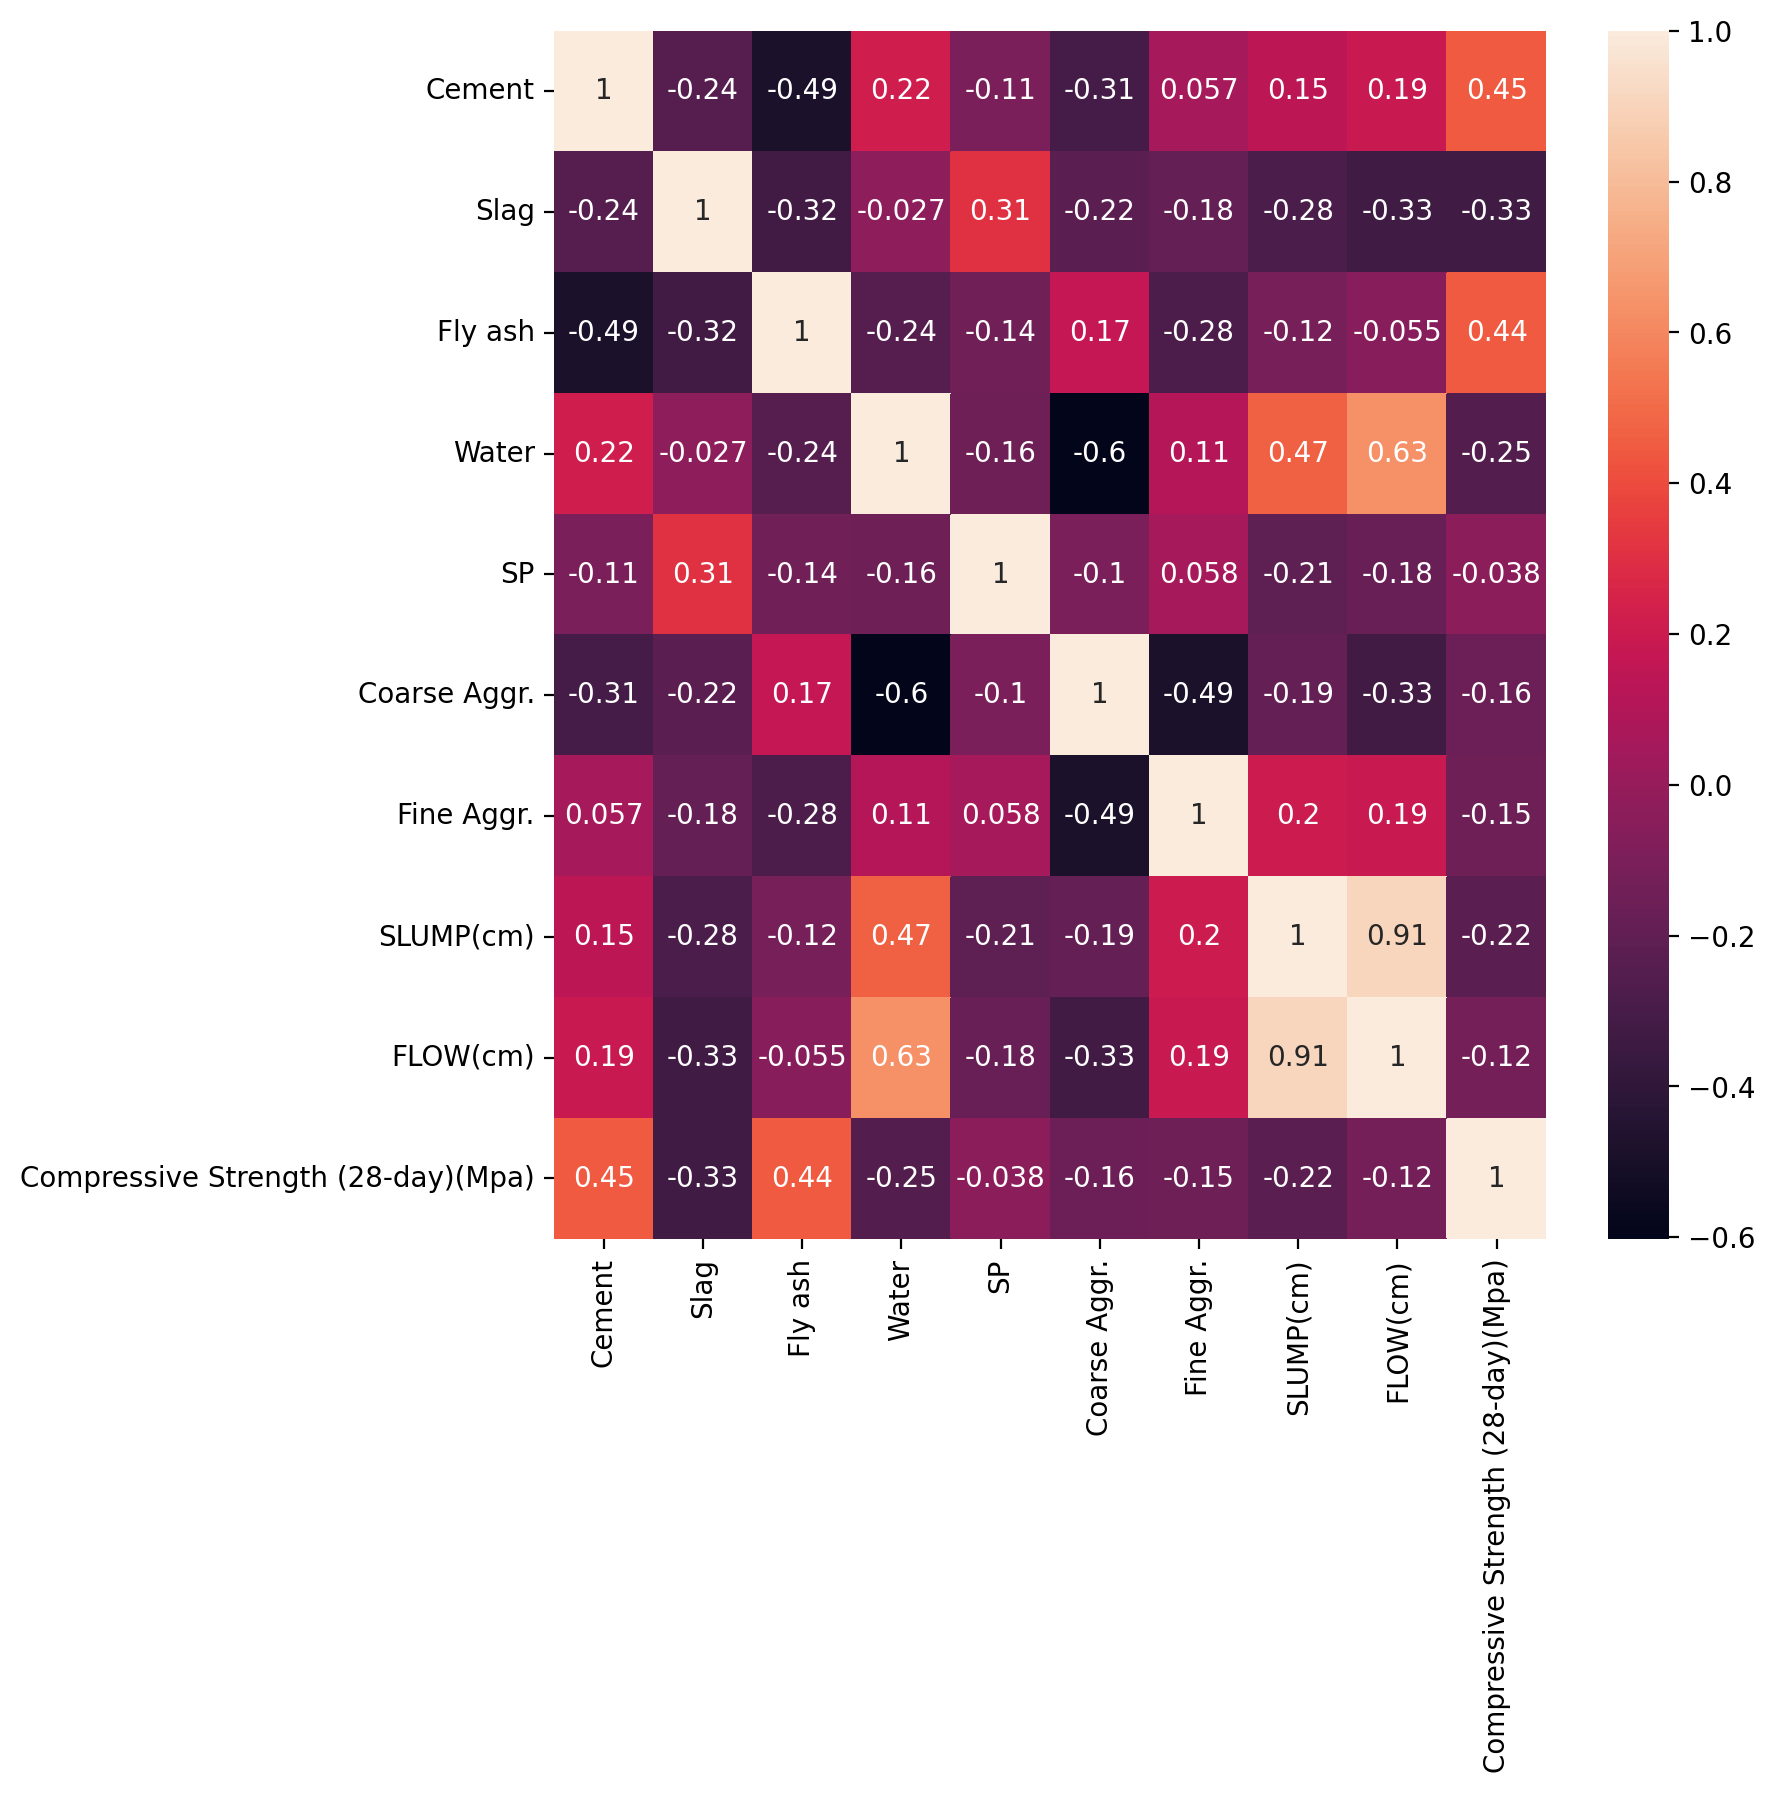

In [5]:
plt.figure(figsize=(8,8),dpi=200)
sns.heatmap(df.corr(),annot = True)

In [6]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Support Vector Machines - Regression

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR. See [Implementation details](https://scikit-learn.org/stable/modules/svm.html#svm-implementation-details) for further details.

In [11]:
from sklearn.svm import SVR, LinearSVR

Setting C: C is 1 by default and it’s a reasonable default choice. If we have a lot of noisy observations we should decrease it: decreasing C corresponds to more regularization.

LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer

Epsilon: https://stats.stackexchange.com/questions/259018/meaning-of-epsilon-in-svm-regression

In [17]:
#help(SVR)

In [14]:
base_model = SVR()

In [15]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [18]:
pred = base_model.predict(scaled_X_test)

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [20]:
mean_absolute_error(y_test,pred)

5.236902091259178

In [21]:
np.sqrt(mean_squared_error(y_test,pred))

6.695914838327133

In [22]:
y_test.mean()

36.26870967741935

## Grid Search 

In [23]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
              'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
svr = SVR()

In [26]:
grid = GridSearchCV(svr,param_grid)

In [28]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [29]:
grid.best_params_

{'C': 1, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [31]:
grid_preds = grid.predict(scaled_X_test)

In [32]:
mean_absolute_error(y_test,grid_preds)

2.5128012210762365

In [33]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.178210305119858